## Industry_Portfolios.xlsx contains monthly nominal (net) returns for ten industry portfolios, expressed in percent. These returns cover the ten-year period from Jan 2004 through Dec 2013.
### Calculate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios. Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios. Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios, with mean return on the vertical axis and standard deviation of return on the horizontal axis. This plot should cover the range from 0% to 2% (in increments of 0.1%) on the vertical axis. Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.
### Now suppose that the risk-free rate is 0.13% per month. Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier generated by the ten industry portfolios. Briefly explain the economic significance and relevance of the efficient frontier to an investor.
### The two frontiers will intersect at single point: the tangency portfolio. Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios. Briefly explain the economic significance and relevance of the tangency portfolio to an investor.
#### Please submit your results and programming code, as (uncompressed) MS Word or Adobe PDF, to the submission folder for Homework 1 before 7 pm on Wednesday, 21 October.


### LEE YU-CHING 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

In [48]:
df = pd.read_csv('Industry_Portfolios.csv',index_col=0,parse_dates=True)
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


## Calculate the vector of mean returns, standard deviation and the covariance matrix of returns for the ten industry portfolios

In [49]:
returns=df.mean()

In [52]:
# Calculate expected mean return
R = returns.values

In [53]:
R = R.reshape((10, 1))

In [54]:
R

array([[0.90283333],
       [0.73333333],
       [1.01283333],
       [1.23116667],
       [0.76625   ],
       [0.88141667],
       [0.91633333],
       [0.78383333],
       [0.90716667],
       [0.48908333]])

In [59]:
R_table = pd.DataFrame(data = R, columns = ['Mean'])
R_table

,Mean
0,0.902833
1,0.733333
2,1.012833
3,1.231167
4,0.766250
5,0.881417
6,0.916333
7,0.783833
8,0.907167
9,0.489083


In [55]:
# Calculate the Covariance matrix
cov=df.cov()

In [56]:
cov

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [57]:
cov2 = df.cov().values

In [58]:
cov2

array([[11.19342216, 18.44966611, 14.10490703, 10.5313412 , 12.92294937,
        11.96807831, 10.17083232,  9.95311174,  7.86665347, 14.4384085 ],
       [18.44966611, 69.92057703, 39.1780972 , 27.0197944 , 35.4666521 ,
        27.49054314, 27.44473081, 16.82400308, 12.74613641, 39.36198711],
       [14.10490703, 39.1780972 , 28.19897006, 23.14537986, 24.61873929,
        19.55014973, 17.62286678, 13.59644703, 11.4406123 , 26.31342279],
       [10.5313412 , 27.0197944 , 23.14537986, 36.98493308, 19.26727584,
        15.36681682, 11.29780011,  9.63032658, 14.02716804, 18.32046915],
       [12.92294937, 35.4666521 , 24.61873929, 19.26727584, 28.95722027,
        18.70827342, 17.83711471, 13.25406408, 10.30418676, 23.85547048],
       [11.96807831, 27.49054314, 19.55014973, 15.36681682, 18.70827342,
        19.78722739, 14.16935566, 11.50659873, 10.99159564, 19.61083576],
       [10.17083232, 27.44473081, 17.62286678, 11.29780011, 17.83711471,
        14.16935566, 16.75908392, 10.17884947

## Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios.

In [11]:
### Creat Standard deviation 
SD=df.std()

In [12]:
table=pd.concat([returns,SD],axis=1)
table

,0,1
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [13]:
SD = SD.values
SD

array([3.34565721, 8.36185249, 5.31027024, 6.08152391, 5.38119134,
       4.44828365, 4.09378601, 3.78717166, 3.70176342, 5.5824521 ])

In [14]:
table.columns = ['mean returns', 'standard deviation']
table

,mean returns,standard deviation
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


#### Calculate the unit vector, alpha, zeta and gamma

In [60]:
e=np.ones((10,1))

#### Calculate the inverse of cov matrix

In [61]:
inverseV.shape

(10, 10)

In [62]:
inverseV = np.linalg.inv(cov2)

In [63]:
alpha = reduce(np.dot, [R.T,inverseV, e])

In [64]:
alpha

array([[0.13794324]])

In [65]:
zeta=reduce(np.dot, [R.T,inverseV, R])

In [66]:
zeta

array([[0.19640858]])

In [67]:
delta=reduce(np.dot, [e.T,inverseV, e])

In [68]:
delta

array([[0.1373876]])

### Function: varaince of R on frontier

In [69]:
total_stock=len(df.columns) #n=10

In [70]:
min_std=[]

In [71]:
limit_var=np.linspace(0.0,2,201)

In [72]:
for R0 in limit_var:
    variance_of_return= (0.1373876*(R0**2)-(2*R0*0.13794324)+0.19640858)/(0.00795577)
    min_std.append(np.sqrt(variance_of_return))

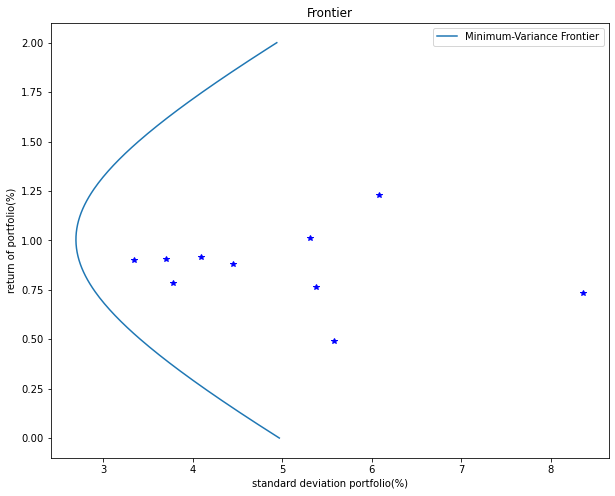

In [73]:
plt.figure(figsize=(10,8))
plt.plot(SD,R,'b*');
plt.plot(min_std,limit_var,label='Minimum-Variance Frontier')
plt.xlabel('standard deviation portfolio(%)')
plt.ylabel('return of portfolio(%)')  
plt.title('Frontier')
plt.legend(loc = 'upper right')
plt.show()

## Summary : Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.


### 	Minimum variance frontier

### The minimum variance frontier represents the lowest variance of all available portfolios of an investor given the level of expected returns. So a rational investor would only choose those portfolios on the minimum variance frontier.

### Efficient frontier

### Because the minimum variance frontier is symmetric. The efficient frontier means that an investor would choose the highest expected return given the level of portfolio variance. So the efficient frontier is just the upper frontier of the minimum variance frontier in (R_p,σ_p)space. In utility theory, generally, an investor’s utility will increase as the expected return is increasing, meanwhile the utility will decrease as the variance is increasing. So an investor will also not choose the low half frontier where expected return falls and variance increases.


## risk-free rate is 0.13%

In [33]:
rf=0.13

In [34]:
limit_var2=np.linspace(0.0,2,201)

In [35]:
min_std2=[]

In [36]:
for R0 in limit_var2:
    variance_of_return= ((R0-rf)**2)/(0.19640858-2*0.13794324*rf+0.1373876*(rf**2))
    min_std2.append(np.sqrt(variance_of_return))

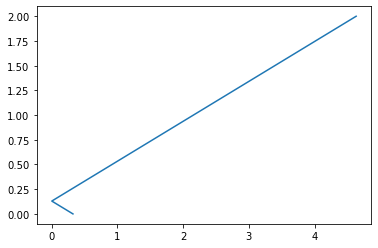

In [37]:
plt.plot(min_std2,limit_var2,label='Efficient Frontier')

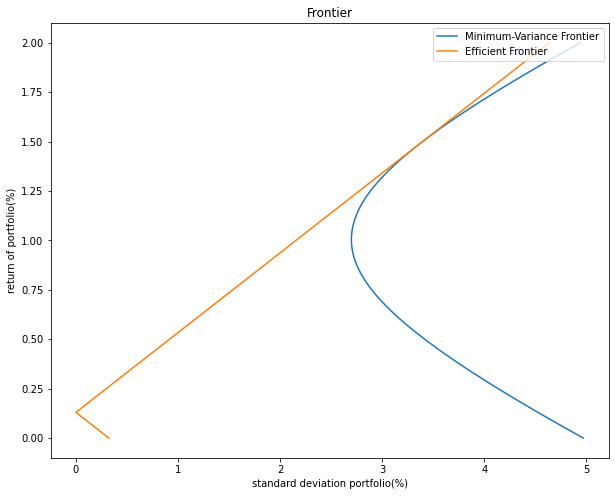

In [38]:
plt.figure(figsize=(10,8))
plt.plot(min_std,limit_var,label='Minimum-Variance Frontier')
plt.plot(min_std2,limit_var2,label='Efficient Frontier')
plt.xlabel('standard deviation portfolio(%)')
plt.ylabel('return of portfolio(%)')  
plt.title('Frontier')
plt.legend(loc = 'upper right')
plt.show()

## %plot tangency portfolio

In [81]:
### Calculate Return of Tangency Portfolio
rtg=(alpha*rf-zeta)/(delta*rf-alpha)

In [82]:
rtg

array([[1.48627354]])

In [83]:
sigmatg=(-(0.19640858-2*0.13794324*rf+0.1373876*rf**2)**0.5)/(0.1373876*(rf-0.13794324/0.1373876))

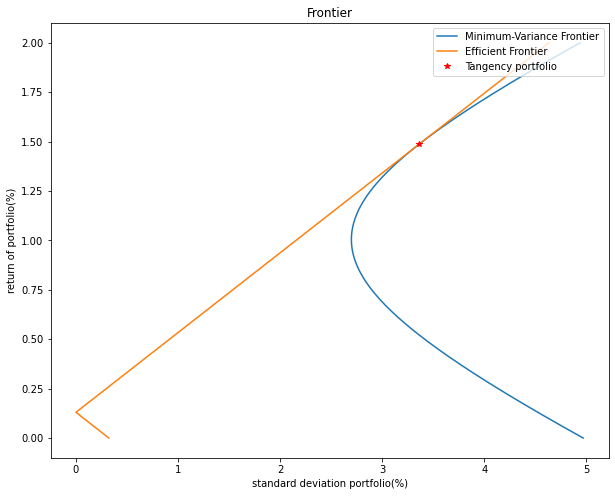

In [84]:
plt.figure(figsize=(10,8))
plt.plot(min_std,limit_var,label='Minimum-Variance Frontier')
plt.plot(min_std2,limit_var2,label='Efficient Frontier')
plt.plot(sigmatg,rtg,'r*',label='Tangency portfolio')
plt.xlabel('standard deviation portfolio(%)')
plt.ylabel('return of portfolio(%)')  
plt.title('Frontier')
plt.legend(loc = 'upper right')
plt.show()

## sharpe ratio of Tangency portfoliosharpe ratio 

In [85]:
### sharpe ratio 
sharpe_ratio = (rtg-rf)/sigmatg

In [86]:
sharpe_ratio

array([[0.40356561]])

## Calculate Weight of Tangency Portfolio

In [87]:
### Calculate a & b 
a = (np.dot(zeta * inverseV, e) - np.dot(alpha * inverseV, R)) / (zeta *delta - alpha**2)
a


array([[ 0.49265898],
       [ 0.1080583 ],
       [-1.95244213],
       [-0.01243221],
       [ 0.52952459],
       [-0.26109318],
       [-0.24849476],
       [ 0.28315077],
       [ 0.69575308],
       [ 1.36531657]])

In [88]:
b = (np.dot(delta * inverseV, R) - np.dot(alpha * inverseV, e)) / (zeta * delta - alpha**2)
b

array([[ 0.05067251],
       [-0.21673729],
       [ 1.79411608],
       [ 0.07839701],
       [-0.60080647],
       [ 0.11143973],
       [ 0.83439661],
       [-0.13966512],
       [-0.37887357],
       [-1.53293948]])

In [90]:
W = a + b * rtg
W

array([[ 0.56797218],
       [-0.2140726 ],
       [ 0.71410511],
       [ 0.10408719],
       [-0.36343817],
       [-0.09546326],
       [ 0.99164683],
       [ 0.0755702 ],
       [ 0.13264333],
       [-0.91305081]])

In [94]:
Name = ["NoDur",'Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth','Utils','Other']
Name

['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [95]:
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
Name_table

,Company
0,NoDur
1,Durbl
2,Manuf
3,Enrgy
4,HiTec
5,Telcm
6,Shops
7,Hlth
8,Utils
9,Other


In [96]:
Weight_table = pd.DataFrame(data = W,columns = ['Weight'])
Weight_table

,Weight
0,0.567972
1,-0.214073
2,0.714105
3,0.104087
4,-0.363438
5,-0.095463
6,0.991647
7,0.075570
8,0.132643
9,-0.913051


In [97]:
table2=pd.concat([Name_table,Weight_table],axis=1)
table2

,Company,Weight
0,NoDur,0.567972
1,Durbl,-0.214073
2,Manuf,0.714105
3,Enrgy,0.104087
4,HiTec,-0.363438
5,Telcm,-0.095463
6,Shops,0.991647
7,Hlth,0.075570
8,Utils,0.132643
9,Other,-0.913051


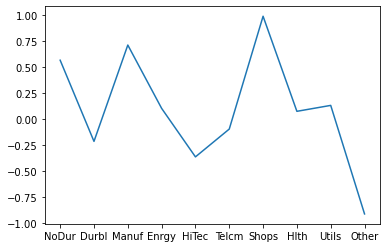

In [103]:
plt.plot(table2['Company'],table2['Weight'])

## Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

### Firstly, any portfolio on the linear efficient frontier can be replicated by combining riskless asset and tangency portfolio. Meanwhile investors could lend money or borrow money with the same risk free rate.

### Secondly, if investors in the market have homogeneous expected return and variance of all asset, then all investors will have the same tangency portfolio. And they will have the same relative weights of risky assets in their respective portfolios.


In [104]:
exit()